# TP Apprentissage non-supervisé
## Clustering
## Laure FEUILLET - Maël PLANTEC

## I - Jeux de données

In [38]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


In [35]:
smile_data = arff.loadarff(open('smile1.arff', 'rt'))
smile = np.array(smile_data)[0]

In [90]:
smile

array([(-3.03573e-01, 7.22940e-01, b'0'),
       (-2.88011e-01, 6.92245e-01, b'0'),
       (-3.06319e-01, 7.08402e-01, b'0'),
       (-3.04490e-01, 7.14163e-01, b'0'),
       (-2.88526e-01, 6.93369e-01, b'0'),
       (-2.94865e-01, 7.03397e-01, b'0'),
       (-3.09865e-01, 6.95185e-01, b'0'),
       (-3.19757e-01, 7.03903e-01, b'0'),
       (-3.20183e-01, 7.12842e-01, b'0'),
       (-3.00677e-01, 7.09206e-01, b'0'),
       (-2.90033e-01, 7.08696e-01, b'0'),
       (-3.03806e-01, 6.88634e-01, b'0'),
       (-2.90896e-01, 6.90484e-01, b'0'),
       (-3.04622e-01, 7.08063e-01, b'0'),
       (-2.99449e-01, 6.96423e-01, b'0'),
       (-2.92722e-01, 7.10400e-01, b'0'),
       (-2.93923e-01, 6.93260e-01, b'0'),
       (-2.90385e-01, 7.02710e-01, b'0'),
       (-2.99496e-01, 6.90104e-01, b'0'),
       (-3.00396e-01, 6.92989e-01, b'0'),
       (-2.97952e-01, 6.92667e-01, b'0'),
       (-3.02485e-01, 6.87109e-01, b'0'),
       (-2.98512e-01, 7.13972e-01, b'0'),
       (-2.82786e-01, 7.15323e-01,

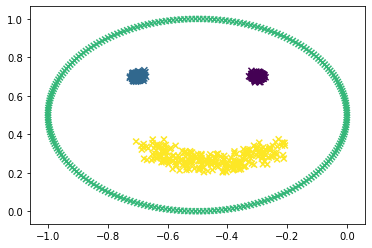

In [65]:
plt.scatter(smile['a0'], smile['a1'], c=smile['class'], marker='x')
plt.show()

In [58]:
square_data = arff.loadarff(open('square5.arff', 'rt'))
square = np.array(square_data)[0]

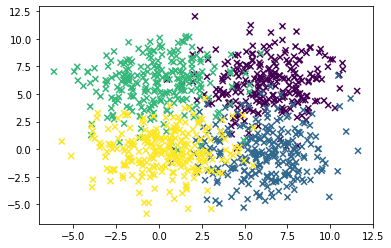

In [63]:
plt.scatter(square['a0'], square['a1'], c=square['class'], marker='x')
plt.show()

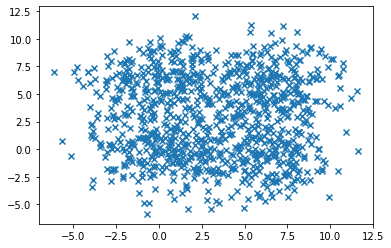

In [159]:
plt.scatter(square['a0'], square['a1'], marker='x')
plt.show()

## II - Clustering k-Means
Le dataset `smile` possède des composantes connexes bien identifiées, avec des densités variables : les yeux sont plus denses que la bouche par exemple. 

In [86]:
from sklearn import cluster
from sklearn import metrics

In [83]:
square_train = list(zip(square['a0'], square['a1']))

In [87]:
kmeans_square  = cluster.KMeans(n_clusters=len(np.unique(square['class'])), init='k-means++')
kmeans_square.fit(square_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
metrics.davies_bouldin_score(square_train, kmeans_square.labels_)

0.747669097645325

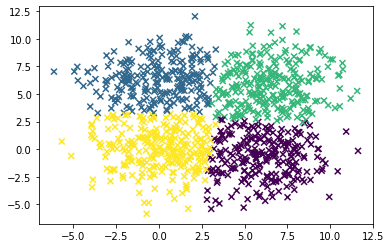

In [85]:
plt.scatter(square['a0'], square['a1'], c=kmeans_square.labels_, marker='x')
plt.show()

In [125]:
range_clusters = range(2, 11)
kmeans_nb_clusters = []
for nb_clusters in range_clusters:
    kmeans  = cluster.KMeans(n_clusters=nb_clusters, init='k-means++')
    kmeans.fit(square_train)
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(square_train, kmeans.labels_)
    # Coefficient de silhouette
    silhouette = metrics.silhouette_score(square_train, kmeans.labels_)
    kmeans_nb_clusters.append((nb_clusters, kmeans.labels_, db, silhouette))

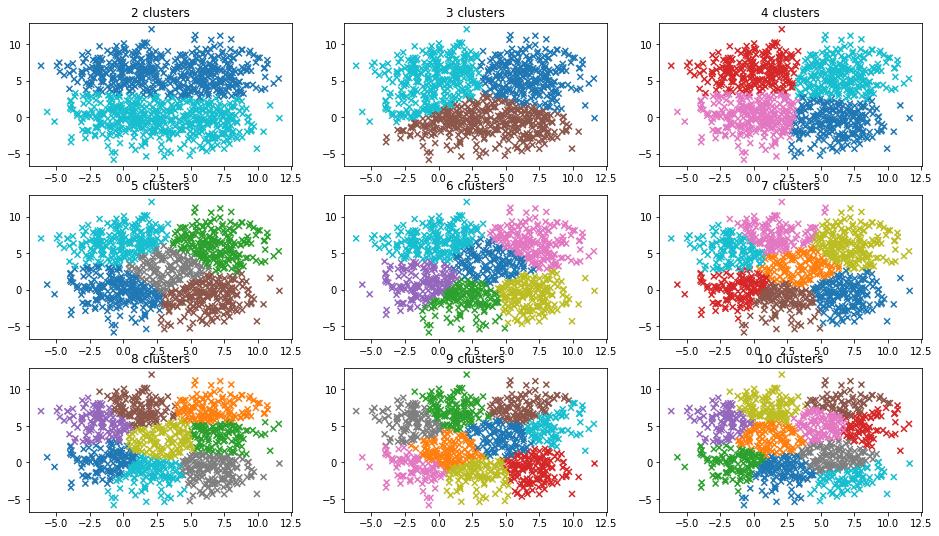

In [141]:
plt.figure(figsize=(16, 9))

i=0
for res in kmeans_nb_clusters:
    plt.subplot(3, 3, i+1)
    plt.scatter(square['a0'], square['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

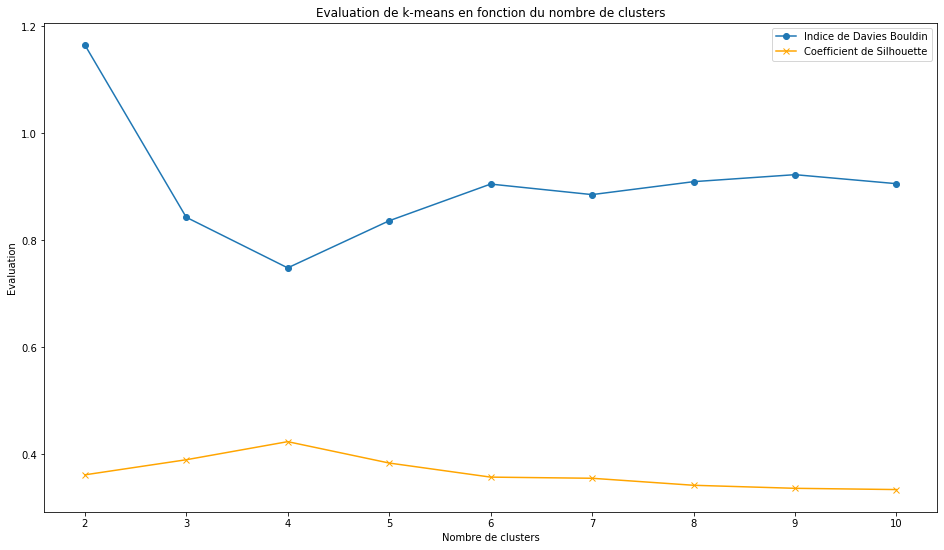

In [158]:
kmeans_nb_clusters_zip = list(zip(*kmeans_nb_clusters))

plt.figure(figsize=(16,9))
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.title("Evaluation de k-means en fonction du nombre de clusters")
plt.xlabel('Nombre de clusters')
plt.ylabel('Evaluation')
plt.legend()
plt.show()

On remarque que... 

In [73]:
kmeans_smile = cluster.KMeans(n_clusters=len(np.unique(smile['class'])), init='k-means++')

In [77]:
smile_train = list(zip(smile['a0'], smile['a1']))

In [78]:
kmeans_smile.fit(smile_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

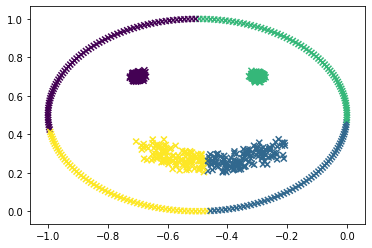

In [80]:
plt.scatter(smile['a0'], smile['a1'], c=kmeans_smile.labels_, marker='x')
plt.show()

In [160]:
range_clusters = range(2, 11)
kmeans_nb_clusters = []
for nb_clusters in range_clusters:
    kmeans  = cluster.KMeans(n_clusters=nb_clusters, init='k-means++')
    kmeans.fit(smile_train)
    # Indice de Davies Bouldin
    db = metrics.davies_bouldin_score(smile_train, kmeans.labels_)
    # Coefficient de silhouette
    silhouette = metrics.silhouette_score(smile_train, kmeans.labels_)
    kmeans_nb_clusters.append((nb_clusters, kmeans.labels_, db, silhouette))

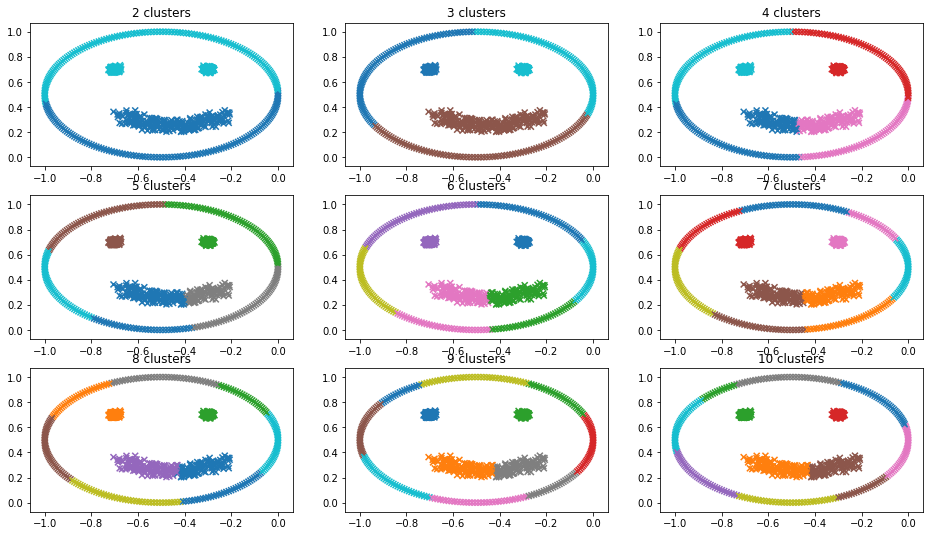

In [162]:
plt.figure(figsize=(16, 9))

i=0
for res in kmeans_nb_clusters:
    plt.subplot(3, 3, i+1)
    plt.scatter(smile['a0'], smile['a1'], c=res[1], marker='x', cmap='tab10')
    plt.title(f"{res[0]} clusters")
    i = i + 1
    
plt.show()

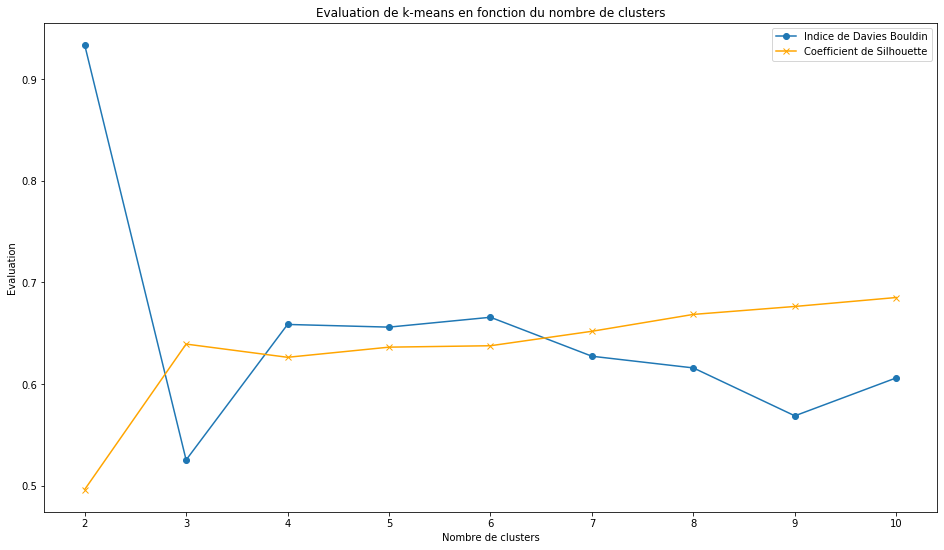

In [163]:
kmeans_nb_clusters_zip = list(zip(*kmeans_nb_clusters))

plt.figure(figsize=(16,9))
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[2], 'o-', label='Indice de Davies Bouldin')
plt.plot(kmeans_nb_clusters_zip[0], kmeans_nb_clusters_zip[3], 'x-', label='Coefficient de Silhouette', color='orange')
plt.title("Evaluation de k-means en fonction du nombre de clusters")
plt.xlabel('Nombre de clusters')
plt.ylabel('Evaluation')
plt.legend()
plt.show()

Non, nous n'arrivons pas à retrouver le résultat précédent (4 clusters). Cela est tout à fait normal car le dataset utilisé n'est pas valable pour kmeans (non connexe).